---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [28]:
def answer_one():
    
    # Your code here
    fraud_data = pd.read_csv('fraud_data.csv')
    class_count = fraud_data.groupby(by=['Class'])['Class'].count()
    
    
    return np.sum(class_count.loc[1])/np.sum(class_count)

In [29]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [35]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    
    return (dummy_majority.score(X_test, y_test),recall_score(y_test,y_dummy_predictions))

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [36]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC()
    svm.fit(X_train,y_train)
    y_svm_predict = svm.predict(X_test)
    
    score_acc = svm.score(X_test,y_test)
    score_recall = recall_score(y_test,y_svm_predict)
    score_precision = precision_score(y_test,y_svm_predict)
    
    return (score_acc,score_recall,score_precision)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [45]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(C=10**9,gamma=10**-7)
    svm.fit(X_train,y_train)
    y_svm_predict = svm.decision_function(X_test) > -220
    
    return confusion_matrix(y_test,y_svm_predict)


### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [148]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import roc_curve, auc
# %matplotlib notebook
# import matplotlib.pyplot as plt

# lr = LogisticRegression()
# lr.fit(X_train,y_train)

# y_scores = lr.decision_function(X_test)

# precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# plt.plot(precision, recall,lw=3, label = 'Precision-Recall Curve')

# fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores)
# plt.plot(fpr_lr, tpr_lr, lw=3, label = 'ROC Curve')

# plt.legend(loc=4)

In [74]:
def answer_five():
        
    # Your code here
    
    return (.82,.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [149]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression()
    
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    grid_lr_acc = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    
    grid_lr_acc.fit(X_train, y_train)
    
    results = pd.DataFrame(grid_lr_acc.cv_results_)[['params','mean_test_score']]
    results = pd.concat([results.drop(['params'], axis=1), results['params'].apply(pd.Series)], axis=1)
    
    return np.array(results.mean_test_score).reshape(5,2)

/Users/andresarbelaez/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/andresarbelaez/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/andresarbelaez/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users

<IPython.core.display.Javascript object>


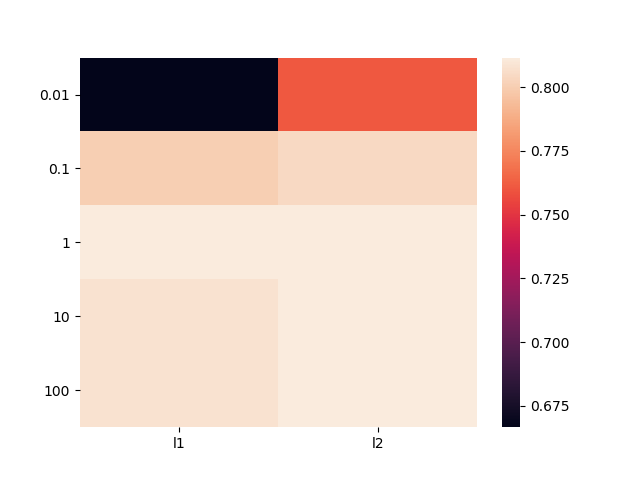

In [150]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())